In [57]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv('sample.csv')

# Просмотр первых строк датасета
df.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0005,B02510,02/12/2019 11:10:30 AM,02/12/2019 11:19:14 AM,80,112,NaN
1,HV0005,B02510,02/12/2019 11:35:27 AM,02/12/2019 11:54:29 AM,256,125,NaN
2,HV0003,B02867,02/12/2019 11:03:14 AM,02/12/2019 11:21:04 AM,210,155,1.0
3,HV0003,B02867,02/12/2019 11:12:12 AM,02/12/2019 11:24:40 AM,155,155,1.0
4,HV0003,B02867,02/12/2019 11:50:05 AM,02/12/2019 11:59:14 AM,155,91,NaN


оценок математического ожидания (среднего); 

In [58]:
import pandas as pd

# Загрузим данные
data = pd.read_csv('sample.csv')

# Преобразуем столбцы 'dropoff_datetime' и 'pickup_datetime' в формат времени
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Рассчитаем продолжительность поездки
data['trip_duration'] = data['dropoff_datetime'] - data['pickup_datetime']

# Рассмотрим среднюю продолжительность поездок
mean_trip_duration = data['trip_duration'].mean()

# Выведем результат
print("Средняя продолжительность поездки:", mean_trip_duration)


Средняя продолжительность поездки: 0 days 00:18:50.533900


среднего квадратического (стандартного) отклонения

In [59]:
import pandas as pd

# Загрузим данные
data = pd.read_csv('sample.csv')

# Преобразуем столбцы 'dropoff_datetime' и 'pickup_datetime' в формат времени
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Рассчитаем продолжительность поездки в секундах (или другой единице измерения на ваш выбор)
data['trip_duration_seconds'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds()

# Рассмотрим стандартное отклонение продолжительности поездок
std_trip_duration = data['trip_duration_seconds'].std()

# Выведем результат
print("Стандартное отклонение продолжительности поездки:", std_trip_duration)


Стандартное отклонение продолжительности поездки: 782.3600138917802


ошибки вычисления среднего значения

In [60]:
# Рассчитаем ошибку вычисления среднего значения продолжительности поездок
mean_trip_error = data['trip_duration_seconds'].sem()

# Выведем результат
print("Ошибки вычисления среднего значения продолжительности поездок:", mean_trip_error)


Ошибки вычисления среднего значения продолжительности поездок: 1.7494101739397003


медианы

In [61]:
# Рассчитаем медиану продолжительности поездок
median_trip_duration = data['trip_duration_seconds'].median()

# Выведем результат
print("Медиана продолжительности поездок:", median_trip_duration)


Медиана продолжительности поездок: 932.0


асимметрии

In [62]:
from scipy.stats import skew

# Рассчитаем коэффициент асимметрии для продолжительности поездок
skewness_trip_duration = skew(data['trip_duration_seconds'].dropna())

# Выведем результат
print("Коэффициент асимметрии продолжительности поездок:", skewness_trip_duration)


Коэффициент асимметрии продолжительности поездок: 2.1606298881532906


эксцесса и их ошибок

In [63]:
from scipy.stats import kurtosis

# Рассчитаем коэффициент эксцесса для продолжительности поездок
kurtosis_trip_duration = kurtosis(data['trip_duration_seconds'].dropna())

# Выведем результат
print("Коэффициент эксцесса продолжительности поездок:", kurtosis_trip_duration)


Коэффициент эксцесса продолжительности поездок: 14.482530120440519


построение доверительных интервалов.

In [64]:
import scipy.stats as stats

# Рассчитаем доверительный интервал для продолжительности поездок (пример для уровня доверия 95%)
confidence_interval = stats.t.interval(0.95, len(data['trip_duration_seconds']) - 1, loc=data['trip_duration_seconds'].mean(), scale=stats.sem(data['trip_duration_seconds']))

# Выведем результат
print("Доверительный интервал для средней продолжительности поездок (95%):", confidence_interval)


Доверительный интервал для средней продолжительности поездок (95%): (1127.105098314286, 1133.962701685714)


3.	Оценка нормальности распределения ИСД (их подчинения нормальному закону);

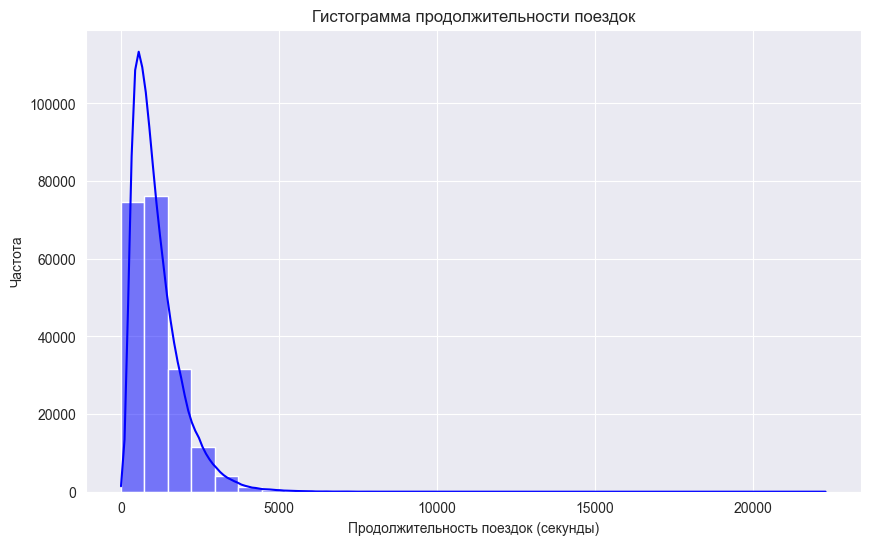

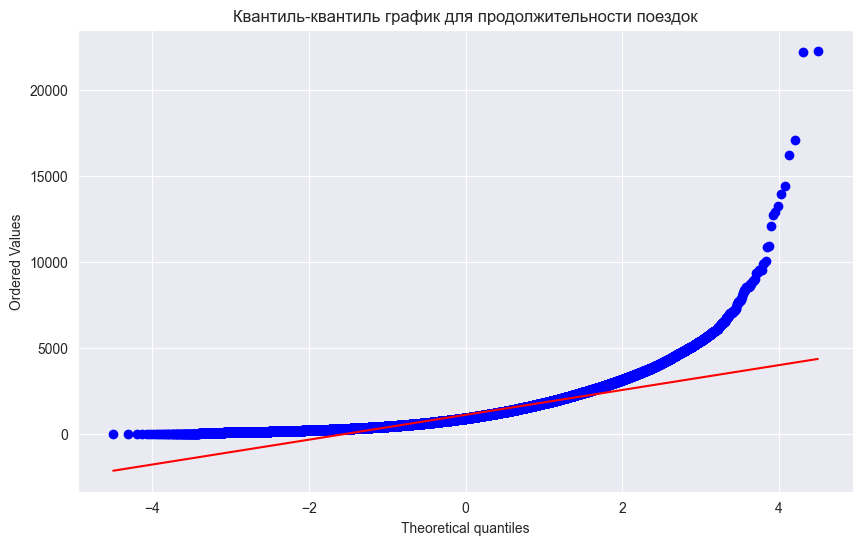

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Построим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_duration_seconds'], bins=30, kde=True, color='blue')
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжительность поездок (секунды)')
plt.ylabel('Частота')
plt.show()

# Построим квантиль-квантиль график
plt.figure(figsize=(10, 6))
probplot(data['trip_duration_seconds'], plot=plt)
plt.title('Квантиль-квантиль график для продолжительности поездок')
plt.show()


4.	Временное прогнозирование.

C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


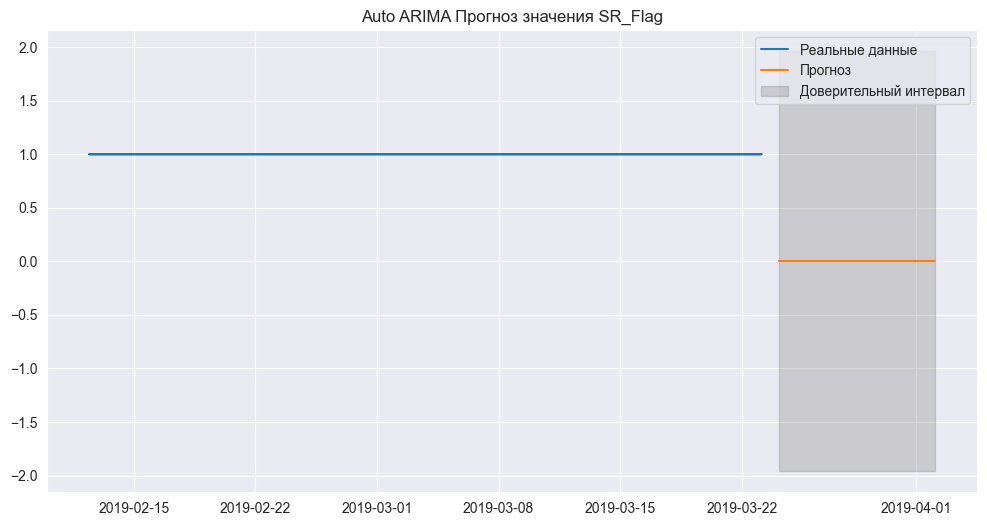

In [66]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Загрузка данных из файла 'sample.csv'
data = pd.read_csv('sample.csv')

# Преобразование столбцов с датой в datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.set_index('pickup_datetime', inplace=True)

# Заполнение пропущенных значений в столбце 'SR_Flag' средним значением
data['SR_Flag'].fillna(data['SR_Flag'].mean(), inplace=True)

# Используем auto_arima для выбора оптимальных параметров модели ARIMA
model = auto_arima(data['SR_Flag'], seasonal=False, suppress_warnings=True)

# Получаем прогноз с индексом
forecast_steps = 10
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq=data.index.freq)[1:]
forecast, conf_int = model.predict(n_periods=forecast_steps, return_conf_int=True, index=forecast_index)

# Построим график с реальными данными и прогнозом
plt.figure(figsize=(12, 6))
plt.plot(data['SR_Flag'], label='Реальные данные')
plt.plot(forecast_index, forecast, label='Прогноз')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3, label='Доверительный интервал')
plt.legend()
plt.title('Auto ARIMA Прогноз значения SR_Flag')
plt.show()


5.	Вычисление парных коэффициентов линейной корреляции.

<Figure size 1000x800 with 0 Axes>

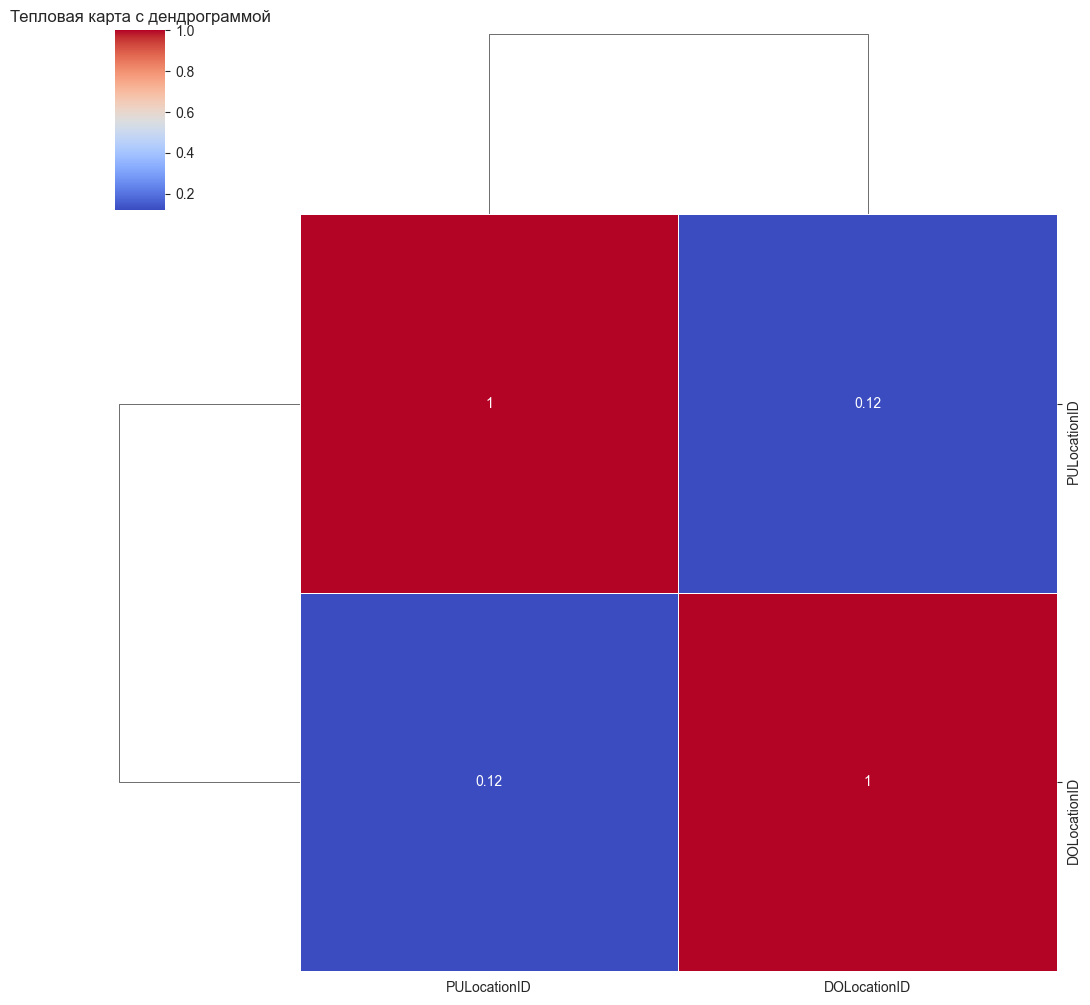

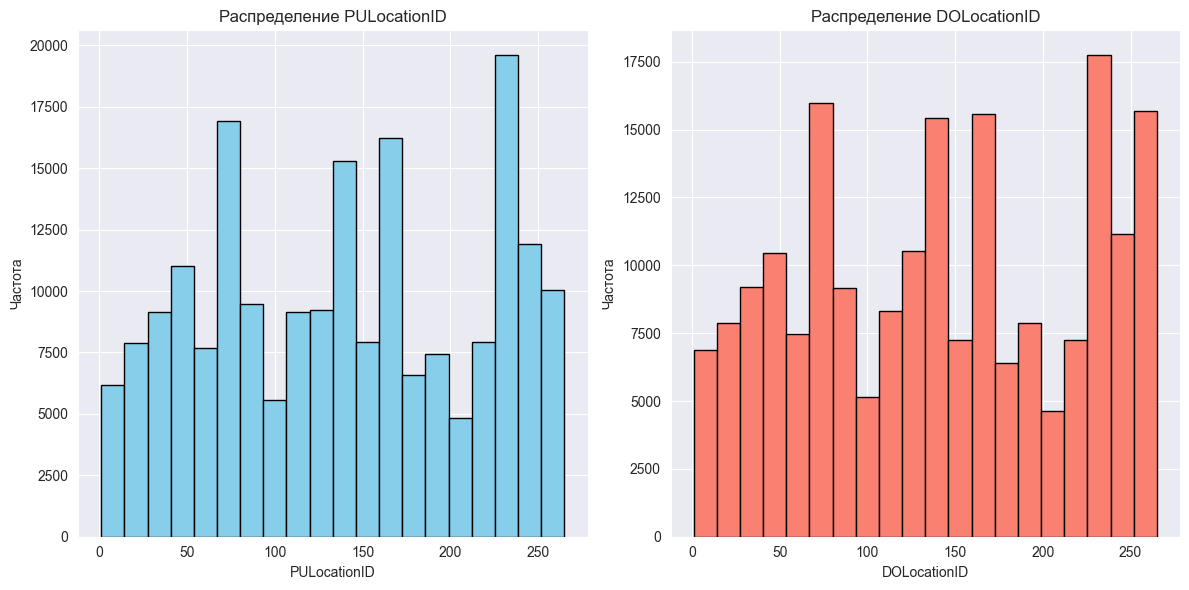

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла 'sample.csv'
data = pd.read_csv('sample.csv')

# Отфильтруем только числовые столбцы
numeric_data = data.select_dtypes(include='number').drop('SR_Flag', axis=1)

# Вычисление матрицы парных коэффициентов линейной корреляции
correlation_matrix = numeric_data.corr()

# Построение тепловой карты с дендрограммой
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Тепловая карта с дендрограммой')
plt.show()
# Построение гистограммы для 'PULocationID'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['PULocationID'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение PULocationID')
plt.xlabel('PULocationID')
plt.ylabel('Частота')

# Построение гистограммы для 'DOLocationID'
plt.subplot(1, 2, 2)
plt.hist(data['DOLocationID'], bins=20, color='salmon', edgecolor='black')
plt.title('Распределение DOLocationID')
plt.xlabel('DOLocationID')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

6.	Методы отбора признаков (используя различные критерии: BIC, AIC, среднеквадратическое отклонение

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла 'sample.csv'
data = pd.read_csv('sample.csv')

# Отфильтруем только числовые столбцы
numeric_data = data.select_dtypes(include='number')

# Удаление строк с пропущенными значениями в целевой переменной
numeric_data = numeric_data.dropna(subset=['SR_Flag'])

# Разделение данных на признаки (X) и целевую переменную (y)
X = numeric_data.drop('SR_Flag', axis=1)
y = numeric_data['SR_Flag']

# Разделение на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Получение прогнозов на тестовом наборе
y_pred = model.predict(X_test)

# Вычисление BIC и AIC
n = len(y_test)
p = X_test.shape[1]
residuals = y_test - y_pred
mse = mean_squared_error(y_test, y_pred)
bic = n * (np.log(mse) + p * np.log(n))
aic = n * np.log(mse) + 2 * p

# Вывод результатов
print("BIC:", bic)
print("AIC:", aic)
print("Среднеквадратическое отклонение (MSE):", mse)

# Оценка значимости коэффициентов с использованием t-теста
X_train_with_intercept = sm.add_constant(X_train)
model_with_intercept = sm.OLS(y_train, X_train_with_intercept).fit()
print(model_with_intercept.summary())


BIC: -inf
AIC: -inf
Среднеквадратическое отклонение (MSE): 0.0
                            OLS Regression Results                            
Dep. Variable:                SR_Flag   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -1.743e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               1.00
Time:                        02:45:52   Log-Likelihood:             1.1687e+06
No. Observations:               34860   AIC:                        -2.337e+06
Df Residuals:                   34857   BIC:                        -2.337e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

C:\Users\wonderkidd\AppData\Local\Temp\ipykernel_11568\2964183893.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * (np.log(mse) + p * np.log(n))
C:\Users\wonderkidd\AppData\Local\Temp\ipykernel_11568\2964183893.py:37: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * p
C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Users\wonderkidd\PycharmProjects\BigD

7.	Факторный анализ

C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:287: RuntimeWarning: divide by zero encountered in log
  ll = llconst + np.sum(np.log(s))
C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:291: RuntimeWarning: invalid value encountered in scalar subtract
  if (ll - old_ll) < self.tol:
C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:297: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


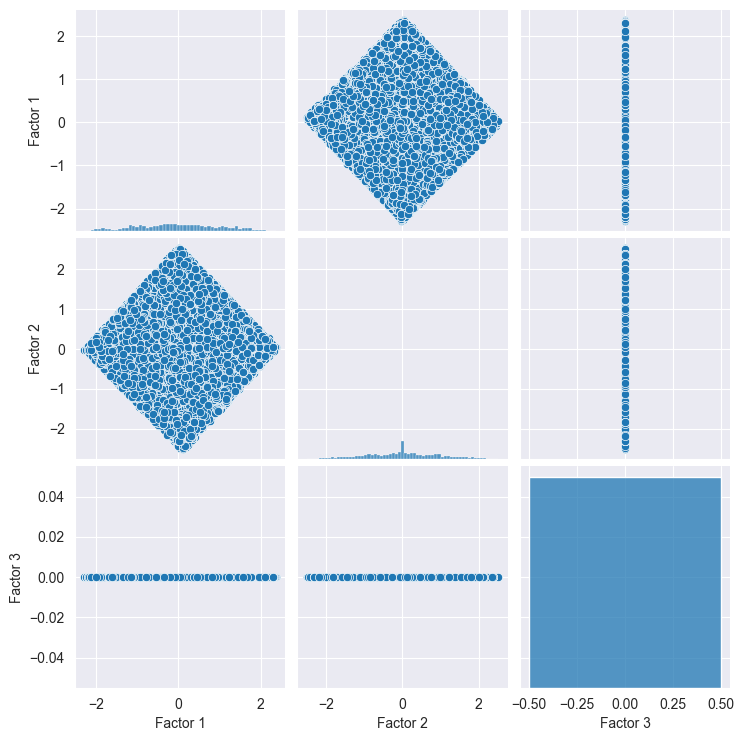

In [69]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла 'sample.csv'
data = pd.read_csv('sample.csv')

# Отфильтруем только числовые столбцы
numeric_data = data.select_dtypes(include='number')

# Удаление строк с пропущенными значениями
numeric_data = numeric_data.dropna()

# Проведем факторный анализ
factor_analysis = FactorAnalysis(n_components=3, random_state=42)
transformed_data = factor_analysis.fit_transform(numeric_data)

# Создадим DataFrame с преобразованными данными
factor_data = pd.DataFrame(transformed_data, columns=['Factor 1', 'Factor 2', 'Factor 3'])

# Визуализация результатов
sns.pairplot(factor_data)
plt.show()


8.	Кластерный анализ

C:\Users\wonderkidd\PycharmProjects\BigData\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


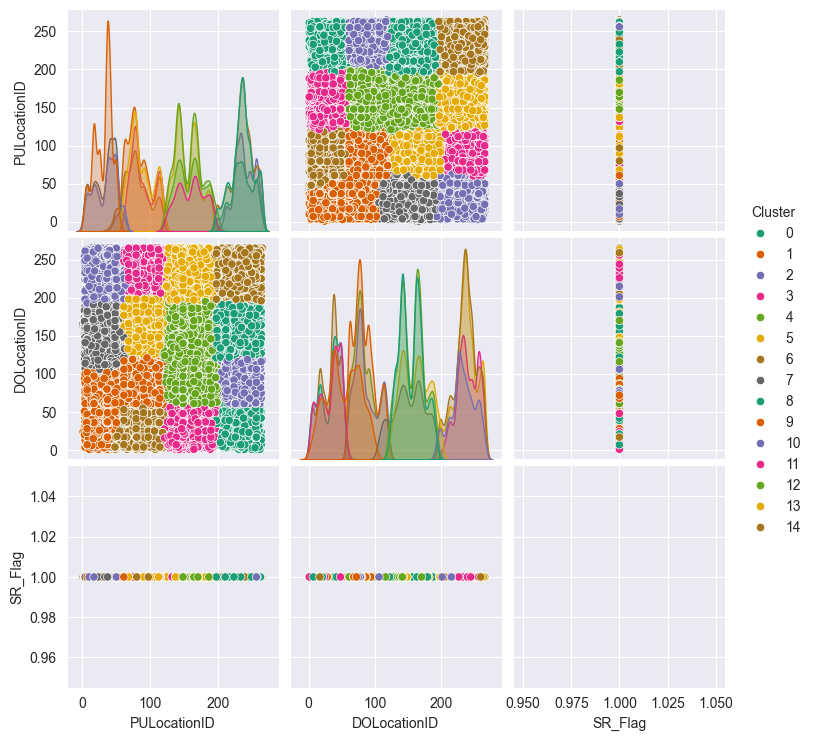

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла 'sample.csv'
data = pd.read_csv('sample.csv')

# Отфильтруем только числовые столбцы
numeric_data = data.select_dtypes(include='number')

# Удаление строк с пропущенными значениями
numeric_data = numeric_data.dropna()

# Выберем количество кластеров (в данном случае, допустим, 3)
num_clusters = 15

# Проведем кластерный анализ с использованием K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data)

# Добавим информацию о кластерах в DataFrame
numeric_data['Cluster'] = clusters

# Визуализация результатов
sns.pairplot(numeric_data, hue='Cluster', palette='Dark2')
plt.show()


9.	Получение уравнений регрессии, представляющих собой зависимость результативных показателей эффективности работы предприятия от влияющих на него производственно-экономических факторов (нейронная сеть (рассмотреть различные методы формирования нейронных сетей))

In [72]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# 
# # Загрузка данных из файла 'sample.csv'
# data = pd.read_csv('sample.csv')
# 
# # Отфильтруем только числовые столбцы
# numeric_data = data.select_dtypes(include='number')
# 
# # Удаление строк с пропущенными значениями
# numeric_data = numeric_data.dropna()
# 
# # Разделение данных на признаки (X) и целевую переменную (y)
# X = numeric_data.drop('SR_Flag', axis=1)
# y = numeric_data['SR_Flag']
# 
# # Нормализация данных
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 
# # Разделение на тренировочный и тестовый наборы данных
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# 
# # Построение нейронной сети
# model = Sequential()
# model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(1, activation='linear'))
# 
# # Компиляция модели
# model.compile(optimizer='adam', loss='mean_squared_error')
# 
# # Обучение модели
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# 
# # Оценка модели
# loss = model.evaluate(X_test, y_test)
# print("Среднеквадратическое отклонение (MSE) на тестовых данных:", loss)


10.	Дисперсионный анализ

In [81]:
import pandas as pd
from scipy.stats import f_oneway

# Загрузка данных
data = pd.read_csv('sample.csv')

# Выбор временного периода или другого критерия для группировки
# Здесь предполагается, что 'SR_Flag' - это критерий для группировки
grouped_data = [group['trip_duration_seconds'] for name, group in data.groupby('SR_Flag')]

# Проведение дисперсионного анализа
anova_result = f_oneway(*grouped_data)

# Вывод результатов
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Проверка статистической значимости
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, различия между группами статистически значимы.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу, различия между группами нестатистически значимы.")


KeyError: 'trip_duration_seconds'

11.	Оптимизация значений выходных факторов и результативных показателей эффективности с целью принятия управляющего решения.

In [83]:
from scipy.optimize import minimize

# Пример функции эффективности (замените на свою функцию)
def objective_function(x):
    # Пример: сумма квадратов
    if None in x:  # Проверка наличия None в векторе
        return float('inf')  # Возвращаем бесконечность, если есть None
    return sum([xi**2 for xi in x])  # Замените на вашу функцию

# Начальные значения факторов
initial_factors = [1.0, 2.0, 3.0]  # Замените на ваши начальные значения

# Проводим оптимизацию
result = minimize(objective_function, initial_factors, method='Nelder-Mead')

# Выводим результаты оптимизации
print("Оптимальные значения факторов:", result.x)
print("Минимальное значение функции эффективности:", result.fun)


Оптимальные значения факторов: [-4.80659631e-05 -1.10944154e-05 -1.86599703e-05]
Минимальное значение функции эффективности: 2.7816173507583477e-09


In [85]:
from scipy.optimize import minimize

# Пример функции эффективности (замените на свою функцию)
def objective_function(x):
    # Пример: минимизация суммы квадратов
    return x[0]**2 + x[1]**2  # Замените на вашу функцию

# Начальные значения факторов
initial_factors = [1.0, 2.0]  # Замените на ваши начальные значения

# Проводим оптимизацию
result = minimize(objective_function, initial_factors, method='Nelder-Mead')

# Выводим результаты оптимизации
print("Оптимальные значения факторов:", result.x)
print("Минимальное значение функции эффективности:", result.fun)


Оптимальные значения факторов: [-3.62769110e-05 -3.03662006e-05]
Минимальное значение функции эффективности: 2.23812040658642e-09


In [ ]:
from scipy.optimize import minimize

# Функция, которую мы оптимизируем
def optimize_function(x):
    # Здесь вставьте вашу функцию
    # Пример: return (x[0] - 2) ** 2 + (x[1] - 3) ** 2

# Начальные значения переменных
x0 = [initial_value1, initial_value2, ...]  # Замените на ваши начальные значения

# Минимизация функции
result = minimize(optimize_function, x0, method='BFGS')

# Получение оптимальных значений переменных
optimal_values = result.x
print("Оптимальные значения переменных:", optimal_values)

# Значение целевой функции при оптимальных значениях
optimal_result = result.fun
print("Значение целевой функции при оптимальных значениях:", optimal_result)
